In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
from PIL import Image

In [12]:
npz_path = "/net/papilio/storage2/yhaoyuan/transformer_I2S/egs/RL_1_3/logs_ddpg_record_choosepos/evaluations.npz"
# npz_path = "/net/papilio/storage2/yhaoyuan/transformer_I2S/egs/RL_1_3/logs_ddpg_hard_img/evaluations.npz"

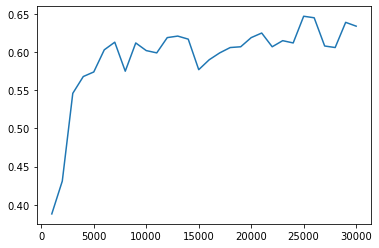

In [13]:
a = np.load(npz_path)
assert len(a["timesteps"]) == len(a["results"])
fig, ax = plt.subplots()
x = a["timesteps"]
y = [rewards.mean() for rewards in a["results"][:]]
ax.plot(x, y)